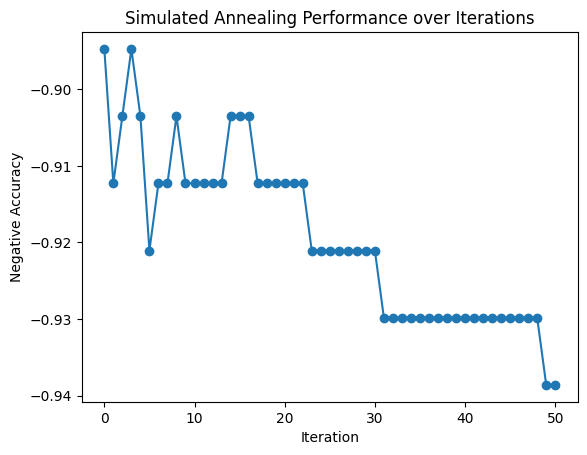

Selected Features: [ 1  3  5  6  7 10 11 12 14 16 17 19 20 24 25 28]


In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import random
import matplotlib.pyplot as plt

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define objective function for feature selection
def objective_function(features, X_train, X_test, y_train, y_test):
    clf = RandomForestClassifier(random_state=42)
    clf.fit(X_train[:, features], y_train)
    y_pred = clf.predict(X_test[:, features])
    accuracy = accuracy_score(y_test, y_pred)
    return -accuracy

# Simulated Annealing for feature selection
def simulated_annealing_feature_selection(X_train, X_test, y_train, y_test, initial_features, max_iterations, initial_temperature, cooling_schedule):
    current_features = initial_features
    current_performance = objective_function(current_features, X_train, X_test, y_train, y_test)
    temperature = initial_temperature

    # Lists to store performance and iteration data for visualization
    performance_history = [current_performance]
    iteration_history = [0]

    for iteration in range(1, max_iterations + 1):
        neighbor_features = generate_neighbor(current_features)
        neighbor_performance = objective_function(neighbor_features, X_train, X_test, y_train, y_test)

        delta_performance = neighbor_performance - current_performance

        if delta_performance < 0 or random.uniform(0, 1) < np.exp(-delta_performance / temperature):
            current_features = neighbor_features
            current_performance = neighbor_performance

        temperature *= cooling_schedule

        # Record performance and iteration data
        performance_history.append(current_performance)
        iteration_history.append(iteration)

    # Plot the performance over iterations
    plt.plot(iteration_history, performance_history, marker='o')
    plt.title('Simulated Annealing Performance over Iterations')
    plt.xlabel('Iteration')
    plt.ylabel('Negative Accuracy')  # Negative because we're maximizing accuracy
    plt.show()

    return current_features

# Generate neighboring solution (toggle a random feature)
def generate_neighbor(current_features):
    neighbor_features = current_features.copy()
    index_to_toggle = random.choice(range(len(current_features)))
    neighbor_features[index_to_toggle] = 1 - neighbor_features[index_to_toggle]
    return neighbor_features

# Randomly initialize feature selection
initial_features = np.random.choice([0, 1], size=X.shape[1])

# Apply Simulated Annealing for feature selection
final_features = simulated_annealing_feature_selection(X_train, X_test, y_train, y_test, initial_features, max_iterations=50, initial_temperature=1.0, cooling_schedule=0.75)

# Display the selected features
selected_features = np.where(final_features == 1)[0]
print("Selected Features:", selected_features)
